<a href="https://colab.research.google.com/github/santosh2994/AAIC/blob/master/santosh2994/Tensorflow/Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

# Fashion MNIST Data

In [2]:
tf.__version__

'2.4.1'

In [3]:
fashion_mnist=tf.keras.datasets.fashion_mnist

In [5]:
(train_data,train_label),(test_data,test_label)=fashion_mnist.load_data()

In [8]:
#Here we are having 60000 samples in train data with each image of size 28*28 = 784
train_data.shape

(60000, 28, 28)

In [9]:
test_data.shape

(10000, 28, 28)

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [11]:
from matplotlib import pyplot as plt

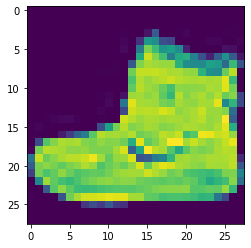

In [15]:
plt.figure()
plt.imshow(train_data[0])
plt.show()

In [17]:
class_names[train_label[0]]

'Ankle boot'

In [18]:
#Process the training an dtest data set
train_data = train_data/255.0
test_data = test_data/255.0

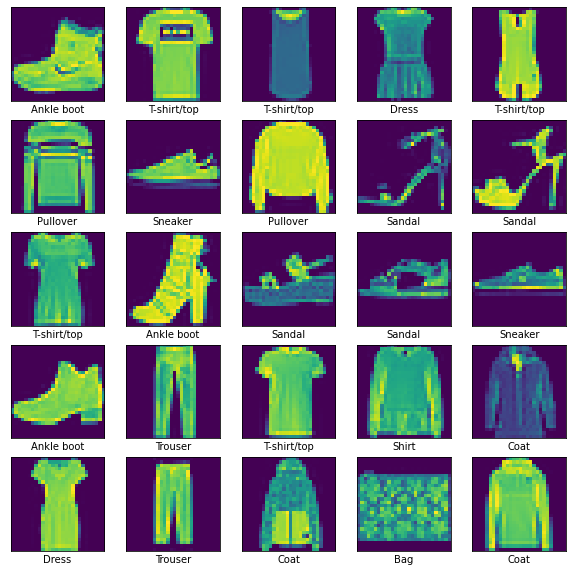

In [27]:
#Let us plot few of our images top 25 images from train_data
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_data[i])
  plt.xlabel(class_names[train_label[i]])
plt.show()

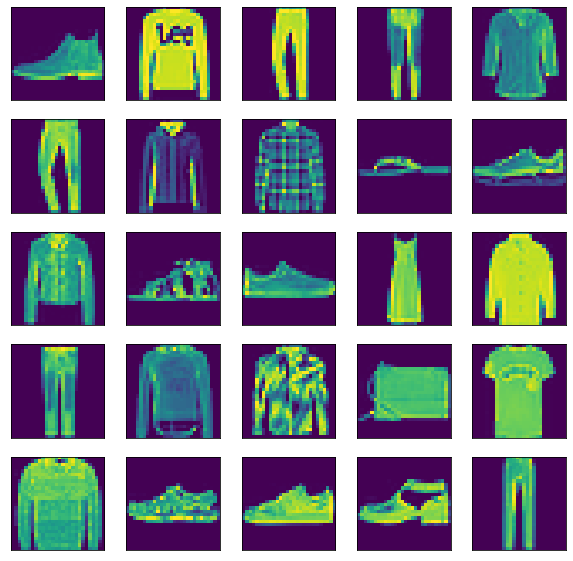

In [28]:
#Let us plot few of our images top 25 images from test_data
#These are the images that we need to find labels for:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(test_data[i])
plt.show()

In [37]:
#Build the Model for Machine LEarning:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28,3)),
                             tf.keras.layers.Dense(128,activation='relu'),
                             tf.keras.layers.Dense(10)
])

In [41]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits='True'),metrics=(['accuracy']))

In [42]:
model.fit(train_data,train_label,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6249 - accuracy: 0.7848
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3806 - accuracy: 0.8614
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3416 - accuracy: 0.8748
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3093 - accuracy: 0.8874
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2885 - accuracy: 0.8935
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2708 - accuracy: 0.9007
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2609 - accuracy: 0.9026
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2506 - accuracy: 0.9082
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2446 - accuracy: 0.9080
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.232

In [43]:
test_loss,test_acc=model.evaluate(test_data, test_label)

313/313 [==============================] - 1s 1ms/step - loss: 0.3474 - accuracy: 0.8793


In [44]:
print(f"Loss on test data : {test_loss}")
print(f"Accuracy : {test_acc}")

Loss on test data : 0.34742432832717896
Accuracy : 0.8792999982833862


In [45]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [47]:
predictions = probability_model.predict(test_data)

In [48]:
predictions[0]

array([1.3247975e-05, 1.2063119e-09, 2.2284011e-08, 1.0989217e-08,
       6.7861492e-07, 5.3869950e-05, 6.1299738e-07, 3.5400867e-02,
       3.5347580e-07, 9.6453035e-01], dtype=float32)

In [50]:
import numpy as np
class_names[np.argmax(predictions[0])]

'Ankle boot'

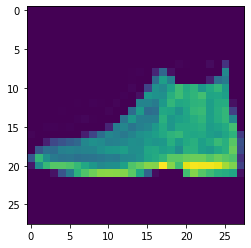

In [53]:
#Looks like the prediction is True
plt.imshow(test_data[0])

In [54]:
#Few functions to predict the test images
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

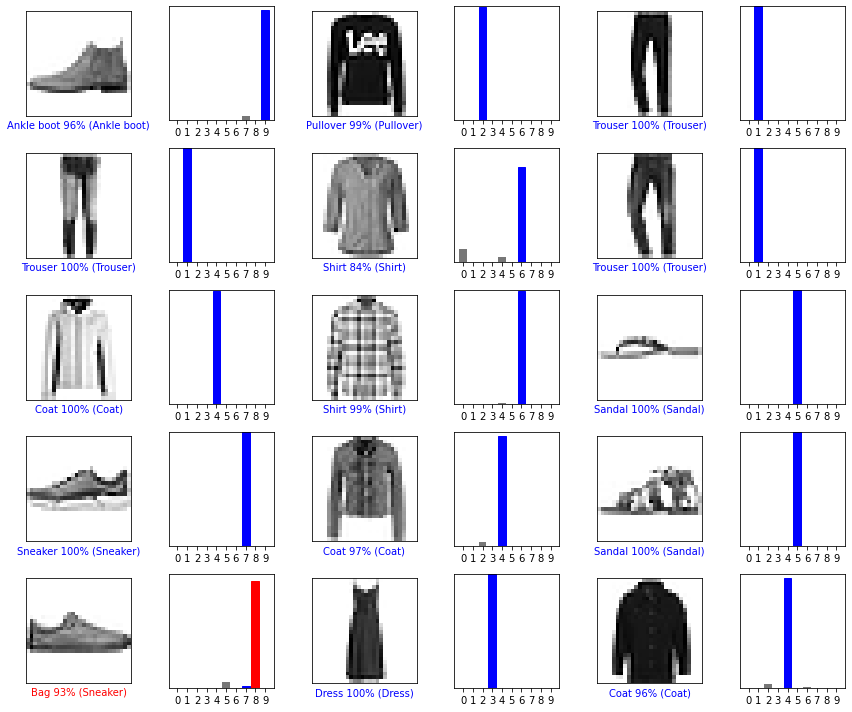

In [59]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_label, test_data)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_label)
plt.tight_layout()
plt.show()

In [61]:
#Plotting the images is really tuff for me : need to understand it more

In [62]:
mnist = tf.keras.datasets.mnist

In [63]:
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [65]:
train_images.shape

(60000, 28, 28)

## CNN usage on fashion_mnist data

In [87]:
import tensorflow as tf
print(tf.__version__)
data = tf.keras.datasets.fashion_mnist.load_data()

(train_images,train_labels),(test_images,test_labels) = data

train_images = train_images.reshape(60000, 28, 28 , 1)
train_images = train_images/255.0
test_images = test_images.reshape(10000, 28, 28 , 1)
test_images = test_images/255.0

#Now let us work on a CNN model:
model_cnn = tf.keras.models.Sequential([
                                 tf.keras.layers.Conv2D(64,(3,3),activation='relu', input_shape=(28, 28, 1)),
                                 tf.keras.layers.MaxPooling2D(2,2),
                                 tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                 tf.keras.layers.MaxPooling2D(2,2),
                                 tf.keras.layers.Flatten(),
                                 tf.keras.layers.Dense(128,activation='relu'),
                                 tf.keras.layers.Dense(10,activation='softmax')
])
model_cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=(['accuracy']))

In [86]:
%%time
model_cnn.fit(train_images,train_labels,epochs=50)

Epoch 1/50
1875/1875 [==============================] - 88s 47ms/step - loss: 0.6071 - accuracy: 0.7819
Epoch 2/50
1875/1875 [==============================] - 87s 47ms/step - loss: 0.2908 - accuracy: 0.8928
Epoch 3/50
1875/1875 [==============================] - 85s 45ms/step - loss: 0.2482 - accuracy: 0.9093
Epoch 4/50
1875/1875 [==============================] - 85s 45ms/step - loss: 0.2095 - accuracy: 0.9214
Epoch 5/50
1875/1875 [==============================] - 85s 45ms/step - loss: 0.1870 - accuracy: 0.9302
Epoch 6/50
1875/1875 [==============================] - 84s 45ms/step - loss: 0.1568 - accuracy: 0.9420
Epoch 7/50
1875/1875 [==============================] - 85s 45ms/step - loss: 0.1387 - accuracy: 0.9476
Epoch 8/50
1875/1875 [==============================] - 86s 46ms/step - loss: 0.1183 - accuracy: 0.9569
Epoch 9/50
1875/1875 [==============================] - 87s 46ms/step - loss: 0.1044 - accuracy: 0.9602
Epoch 10/50
1875/1875 [==============================] - 86s 46m

In [88]:
test_loss,test_acc=model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3474 - accuracy: 0.8793


In [89]:
predictions = probability_model.predict(test_images)

In [90]:
predictions[0]

array([1.3247975e-05, 1.2063119e-09, 2.2284011e-08, 1.0989217e-08,
       6.7861492e-07, 5.3869950e-05, 6.1299738e-07, 3.5400867e-02,
       3.5347580e-07, 9.6453035e-01], dtype=float32)

In [95]:
class_names[np.argmax(predictions[0])]

'Ankle boot'